In [1]:
import numpy as np
import matplotlib.pylab as plt
import re
import sys
from astropy.io import fits
import scipy.stats
from astropy import coordinates as coord
from astropy import units as u
from astropy.time import Time
import pdb

In [2]:
dithertiles = np.genfromtxt('/Users/crockosi/desi/observing/dithertiles.txt',comments='#',dtype=[('id','i8'),('tileid','i8'),('ra','f8'),('dec','f8'),('program','S4'),('selected','S6')])

In [3]:
dtilecoords = coord.SkyCoord(dithertiles['ra']*u.deg,dithertiles['dec']*u.deg,frame='icrs')

(360.0, 0.0)

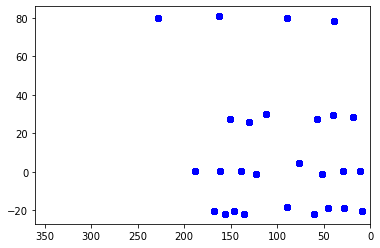

In [4]:
plt.plot(dtilecoords.ra,dtilecoords.dec,'bo')
plt.xlim(360,0)

In [5]:
kpnoloc = coord.EarthLocation.of_site('Kitt Peak')

In [6]:
thisobstime = Time('2020-12-28T4:30:00',scale='utc',location=kpnoloc)


In [7]:
dtilecoords = coord.SkyCoord(dithertiles['ra']*u.deg,dithertiles['dec']*u.deg,frame='icrs',location=kpnoloc)

In [8]:
print(dtilecoords[0].ra)
print(dtilecoords[0].dec)

18d24m00s
28d20m24s


In [9]:
dtilecoords[0].ra.deg

18.4

In [10]:
dtilecoords[0].ra.hour

1.2266666666666668

In [11]:
dtilecoordsnow = dtilecoords.transform_to(coord.ITRS(obstime=thisobstime))

In [12]:
dtilecoordsnow[0]

<SkyCoord (ITRS: obstime=2020-12-28T04:30:00.000): (x, y, z) [dimensionless]
    (-0.72822156, -0.49266785, 0.47641552)>

In [13]:
dtilecoordsnowsp = dtilecoordsnow.spherical

In [14]:
dtilecoordsnowsp[0]

<SphericalRepresentation (lon, lat, distance) in (deg, deg, )
    (214.07975274, 28.45155424, 1.)>

In [15]:
dtilecoordsnowsp[0].lon.hourangle

14.271983516073792

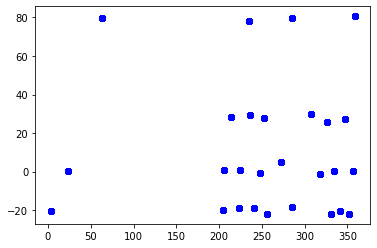

In [16]:
plt.plot(dtilecoordsnowsp.lon,dtilecoordsnowsp.lat,'bo')

In [17]:
dtilecoordsnow.obstime.sidereal_time('apparent')

<Longitude 3.53373166 hourangle>

In [18]:
itest,=np.where(dithertiles['tileid'] == 80371)

In [19]:
itest

array([117])

In [20]:
print(dtilecoordsnow[36])
print(dtilecoordsnowsp[36])

<SkyCoord (ITRS: obstime=2020-12-28T04:30:00.000): (x, y, z) [dimensionless]
    (-0.25979208, -0.84732318, 0.46319705)>
(252.95428768, 27.59360029, 1.) (deg, deg, )


In [21]:
dtilecoords[36]

<SkyCoord (ICRS): (ra, dec) in deg
    (57.24, 27.53)>

In [22]:
hanowraw = kpnoloc.lon-dtilecoordsnowsp[36].lon

In [23]:
hanowraw + 360*u.deg

<Angle -4.55428768 deg>

In [24]:
hanow = hanowraw.wrap_at(180*u.deg)

In [25]:
print(hanowraw)
print(hanow)

-364d33m15.4356s
-4d33m15.4356s


In [26]:
dtilehanow = kpnoloc.lon-dtilecoordsnowsp.lon

In [27]:
dtilehanow.wrap_at(180*u.deg,inplace=True)

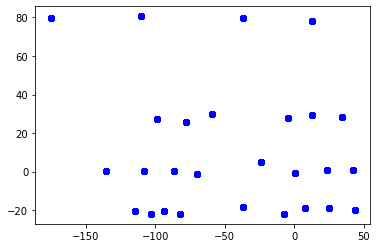

In [28]:
plt.plot(dtilehanow,dtilecoordsnowsp.lat,'bo')

In [29]:
list(range(0,351,13))

[0,
 13,
 26,
 39,
 52,
 65,
 78,
 91,
 104,
 117,
 130,
 143,
 156,
 169,
 182,
 195,
 208,
 221,
 234,
 247,
 260,
 273,
 286,
 299,
 312,
 325,
 338]

In [30]:
for i in range(0,351,13):
    print(dithertiles['tileid'][i])

80254
80267
80280
80293
80306
80319
80332
80345
80358
80371
80384
80397
80410
80423
80436
80449
80462
80475
80488
80501
80514
80527
80540
80553
80566
80579
80592


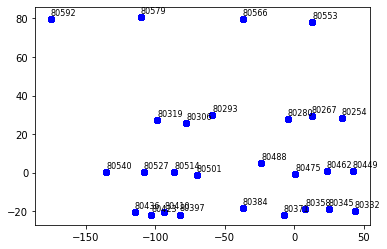

In [35]:
plt.plot(dtilehanow,dtilecoordsnowsp.lat,'bo')
for i in range(0,351,13):
    plt.text(dtilehanow[i].value,dtilecoordsnowsp[i].lat.value+2,dithertiles['tileid'][i],fontsize=8)